In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
# Upload the fitting results for each model
# Upload the fitting results for each model
bat_casey = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

bat_decompir = pd.read_csv('../data/bat-agn-decompir-params.csv', index_col=0)
bat_dale14 = pd.read_csv('../data/bat-agn-d14-params.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources[:-1])

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

In [4]:
# Combine the total IR luminosities into one DataFrame
bat_lir = pd.DataFrame(index=bat_casey.index)
bat_lir['LSFC12'] = bat_casey['lir_sf']
bat_lir['LSFC12_err_up'] = bat_casey['lir_sf_err_high']
bat_lir['LSFC12_err_down'] = bat_casey['lir_sf_err_low']
bat_lir['LSFC12_flag'] = bat_casey['lir_sf_flag']
bat_lir['LSFDecompIR'] = bat_decompir['lir_sf']
bat_lir['LSFDecompIR_err_up'] = bat_decompir['lir_sf_err_high']
bat_lir['LSFDecompIR_err_down'] = bat_decompir['lir_sf_err_low']
bat_lir['LSFDecompIR_flag'] = bat_decompir['lir_sf_flag']
bat_lir['LSFD14'] = bat_dale14['lir_sf']
bat_lir['LSFD14_err_up'] = bat_dale14['lir_sf_err_high']
bat_lir['LSFD14_err_down'] = bat_dale14['lir_sf_err_low']
bat_lir['LSFD14_flag'] = bat_dale14['lir_sf_flag']

bat_lir.loc['2MASXiJ1802473-145454', 'LSFDecompIR'] = bat_lir.loc['2MASXiJ1802473-145454', 'LSFDecompIR'] + 2.046
bat_lir.loc['2MASXiJ1802473-145454', 'LSFD14'] = bat_lir.loc['2MASXiJ1802473-145454', 'LSFD14'] + 2.046

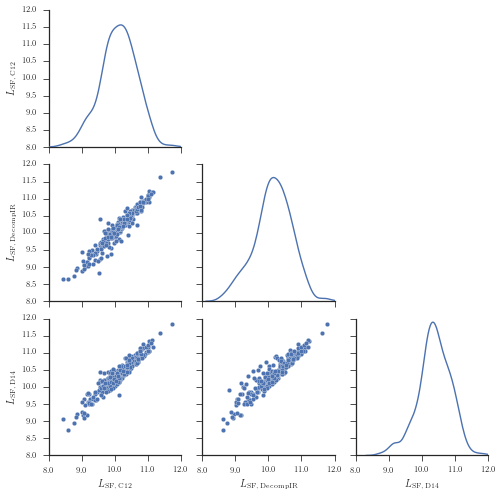

In [14]:
# Plot the correlation between each LIR using seaborn's pairplot method
g = sn.pairplot(bat_lir, diag_kind="kde", size=textwidth/3., aspect=1.)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

for i,ax in enumerate(g.axes[-1,:]):
    if i == 0:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,C12}$')
    elif i == 1:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,DecompIR}$')
    elif i == 2:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,D14}$')
    ax.set_xlim(8.0, 12.0)    
    ax.xaxis.set_ticks([8.0, 9.0, 10.0, 11.0, 12.0])
    ax.xaxis.set_ticklabels(['8.0', '9.0', '10.0', '11.0', '12.0'])

for i,ax in enumerate(g.axes[:,0]):
    if i == 0:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,C12}$')
        #ax.yaxis.set_ticklabels([])
    elif i == 1:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,DecompIR}$')
    elif i == 2:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,D14}$')
    ax.set_ylim(8.0, 12.0)
#        if j == 0:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,C12}$')          
#        if j == 1:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,DecompIR}$')
#        if j == 2:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,D14}$')
g.fig.savefig(figsave_dir+'lsf_total-comparison.pdf', bbox_inches='tight')

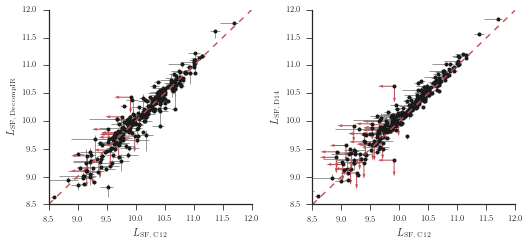

In [5]:
fig = plt.figure(figsize=(1.2*textwidth, 1/2.*textwidth))
ind1 = (bat_lir['LSFC12_flag'] == 0) & (bat_lir['LSFDecompIR_flag'] == 0)
ind2 = (bat_lir['LSFC12_flag'] == -1) & (bat_lir['LSFDecompIR_flag'] == 0)
ind3 = (bat_lir['LSFC12_flag'] == 0) & (bat_lir['LSFDecompIR_flag'] == -1)
ind4 = (bat_lir['LSFC12_flag'] == -1) & (bat_lir['LSFDecompIR_flag'] == -1)

ax1 = fig.add_subplot(121)
ax1.errorbar(bat_lir['LSFC12'][ind1], bat_lir['LSFDecompIR'][ind1],
             xerr=np.vstack([bat_lir['LSFC12_err_down'][ind1], bat_lir['LSFC12_err_up'][ind1]]),
             yerr=np.vstack([bat_lir['LSFDecompIR_err_down'][ind1], bat_lir['LSFDecompIR_err_up'][ind1]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.errorbar(bat_lir['LSFC12'][ind2], bat_lir['LSFDecompIR'][ind2],
             yerr=np.vstack([bat_lir['LSFDecompIR_err_down'][ind2], bat_lir['LSFDecompIR_err_up'][ind2]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.quiver(bat_lir['LSFC12'][ind2], bat_lir['LSFDecompIR'][ind2], -np.ones(sum(ind2)), np.zeros(sum(ind2)),
           scale_units='width', scale=12, units='height', width=0.005, color='r', pivot='tail')
ax1.errorbar(bat_lir['LSFC12'][ind3], bat_lir['LSFDecompIR'][ind3],
             xerr=np.vstack([bat_lir['LSFC12_err_down'][ind3], bat_lir['LSFC12_err_up'][ind3]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.quiver(bat_lir['LSFC12'][ind3], bat_lir['LSFDecompIR'][ind3], np.zeros(sum(ind3)), -np.ones(sum(ind3)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.plot(bat_lir['LSFC12'][ind4], bat_lir['LSFDecompIR'][ind4], 'ko', ms=4)
ax1.quiver(bat_lir['LSFC12'][ind4], bat_lir['LSFDecompIR'][ind4], np.zeros(sum(ind4)), -np.ones(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.quiver(bat_lir['LSFC12'][ind4], bat_lir['LSFDecompIR'][ind4], -np.ones(sum(ind4)), np.zeros(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.set_xlabel(r'$L_{\rm SF,\,C12}$')
ax1.set_ylabel(r'$L_{\rm SF,\,DecompIR}$')
ax1.plot(np.arange(8.5, 12.0, 0.001), np.arange(8.5, 12.0, 0.001), 'r--')
ax1.set_xlim(8.5, 12.0)
ax1.set_ylim(8.5, 12.0)

ind1 = (bat_lir['LSFC12_flag'] == 0) & (bat_lir['LSFD14_flag'] == 0)
ind2 = (bat_lir['LSFC12_flag'] == -1) & (bat_lir['LSFD14_flag'] == 0)
ind3 = (bat_lir['LSFC12_flag'] == 0) & (bat_lir['LSFD14_flag'] == -1)
ind4 = (bat_lir['LSFC12_flag'] == -1) & (bat_lir['LSFD14_flag'] == -1)

ax2 = fig.add_subplot(122)
ax2.errorbar(bat_lir['LSFC12'][ind1], bat_lir['LSFD14'][ind1],
             xerr=np.vstack([bat_lir['LSFC12_err_down'][ind1], bat_lir['LSFC12_err_up'][ind1]]),
             yerr=np.vstack([bat_lir['LSFD14_err_down'][ind1], bat_lir['LSFD14_err_up'][ind1]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.errorbar(bat_lir['LSFC12'][ind2], bat_lir['LSFD14'][ind2],
             yerr=np.vstack([bat_lir['LSFD14_err_down'][ind2], bat_lir['LSFD14_err_up'][ind2]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.quiver(bat_lir['LSFC12'][ind2], bat_lir['LSFD14'][ind2], -np.ones(sum(ind2)), np.zeros(sum(ind2)),
           scale_units='width', scale=12, units='height', width=0.005, color='r', pivot='tail')
ax2.errorbar(bat_lir['LSFC12'][ind3], bat_lir['LSFD14'][ind3],
             xerr=np.vstack([bat_lir['LSFC12_err_down'][ind3], bat_lir['LSFC12_err_up'][ind3]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.quiver(bat_lir['LSFC12'][ind3], bat_lir['LSFD14'][ind3], np.zeros(sum(ind3)), -np.ones(sum(ind3)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.plot(bat_lir['LSFC12'][ind4], bat_lir['LSFD14'][ind4], 'ko', ms=4)
ax2.quiver(bat_lir['LSFC12'][ind4], bat_lir['LSFD14'][ind4], np.zeros(sum(ind4)), -np.ones(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.quiver(bat_lir['LSFC12'][ind4], bat_lir['LSFD14'][ind4], -np.ones(sum(ind4)), np.zeros(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.set_xlabel(r'$L_{\rm SF,\,C12}$')
ax2.set_ylabel(r'$L_{\rm SF,\,D14}$')
ax2.plot(np.arange(8.5, 12.0, 0.001), np.arange(8.5, 12.0, 0.001), 'r--')
ax2.set_xlim(8.5, 12.0)
ax2.set_ylim(8.5, 12.0)
fig.subplots_adjust(wspace=0.3)
sn.despine()
fig.savefig(figsave_dir+'lir_sf-comparison_nokde.pdf', bbox_inches='tight')

Notes:
Need to change the axis labels [DONE]
Need to adjust the line-width and marker sizes [no need to]
Need to adjust tick labels especially for x-axis [DONE]

In [6]:
# Analysis
bat_lir['LSFC12'][(bat_lir['LSFC12_flag'] == 0) | (bat_lir['LSFC12'] == -1)].describe()

count    271.000000
mean      10.123050
std        0.523920
min        8.439936
25%        9.784202
50%       10.153473
75%       10.468879
max       11.706022
Name: LSFC12, dtype: float64

In [7]:
bat_lir['LSFDecompIR'][(bat_lir['LSFDecompIR_flag'] == 0) | (bat_lir['LSFDecompIR'] == -1)].describe()

count    271.000000
mean      10.116760
std        0.555070
min        8.609708
25%        9.792830
50%       10.132637
75%       10.499462
max       11.765660
Name: LSFDecompIR, dtype: float64

In [52]:
bat_lir['LSFD14'][(bat_lir['LSFD14_flag'] == 0) | (bat_lir['LSFD14'] == -1)].describe()

count    271.000000
mean      10.190952
std        0.519275
min        8.655741
25%        9.870311
50%       10.172568
75%       10.547659
max       11.835384
Name: LSFD14, dtype: float64

In [8]:
(bat_lir['LSFC12'] - bat_lir['LSFDecompIR'])[(bat_lir['LSFC12_flag'] == 0)].describe()

count    271.000000
mean       0.006290
std        0.155228
min       -0.474149
25%       -0.074608
50%       -0.009187
75%        0.068819
max        0.710498
dtype: float64

In [9]:
(bat_lir['LSFC12'] - bat_lir['LSFD14'])[(bat_lir['LSFC12_flag'] == 0)].describe()

count    271.000000
mean      -0.067903
std        0.114770
min       -0.555105
25%       -0.122289
50%       -0.047238
75%       -0.002447
max        0.405328
dtype: float64

In [11]:
(bat_lir['LSFD14'] - bat_lir['LSFDecompIR'])[(bat_lir['LSFC12_flag'] == 0) | (bat_lir['LSFC12'] == -1)].describe()

count    271.000000
mean       0.074192
std        0.130103
min       -0.156954
25%        0.002418
50%        0.040757
75%        0.101493
max        0.751839
dtype: float64